In [293]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome(executable_path = r'C:\Users\ajsre\.wdm\drivers\chromedriver\win32\85.0.4183.87\chromedriver.exe')
driver
driver.get('https://www.instagram.com/?hl=en')
driver.implicitly_wait(10)
#importing  differnt libraries and webdriver
#passing on the url for Instagram page

In [294]:
name=driver.find_element_by_name('username')
name.send_keys('sampleusername')
#finding the username textbox and sending required keys

In [295]:
password=driver.find_element_by_name('password')
password.send_keys('sample password')
#finding the password textbox and sending required keys

In [296]:
enter=driver.find_elements_by_class_name('Igw0E')
enter[2].click()
#pressing enter

Question 1 part 1:

In [298]:
search=driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
search.get_attribute('outerHTML')
search.send_keys('food')
#searching food 

In [299]:
food=driver.find_elements_by_class_name('Ap253')
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
lst=[]
for i in food:
    nme=i.get_attribute('innerHTML')
    lst.append(remove_html_tags(nme))
#getting the list of all the handles we are getting after typing food   

In [300]:
search.clear()
#clearing search

In [301]:

lst=lst[0:10]
lst

#Taking out first 10 handles

['foodtalkindia',
 'yourfoodlab',
 'foodfoodtv',
 'foodnetwork',
 'meghnasfoodmagic',
 'hmm_nikhil',
 'food',
 'dilsefoodie',
 'foodgod',
 'love_food']

In [302]:

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [304]:
# sample cell
lst2=[]
#defining an emptylist which will have thew followers of first 10 handles
for i in range (0,10):
            

            str=lst[i]
            print(str)
            driver.get('https://www.instagram.com/' + str) 
            #directly visiting handle'surl
           
            #addding explicit wait to find the number of followers and waiting for the element to be present
            wait = WebDriverWait(driver, 2)
            lap1 = wait.until(EC.presence_of_element_located((By.XPATH, 
                                                         '//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')))                                        
            #getting the number of followers
            number=lap1.get_attribute('title')
            lst2.append(number)
            #appending the number of followers of a page into the list
            driver.implicitly_wait(1)
            
            driver.back()
            #coming back to base page
            driver.implicitly_wait(5)
            lap2 = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 
                                                         'XTCLo')))                                        
            #finding search button and clearing it 
            lap2.clear()


foodtalkindia
yourfoodlab
foodfoodtv
foodnetwork
meghnasfoodmagic
hmm_nikhil
food
dilsefoodie
foodgod
love_food


In [305]:

#changhing the type of followers from string to float and appendig in a list x 
x=[]
for i in lst2:
    i= i.replace(",",'')
    i=float(i)
    x.append(i)
x    

[302293.0,
 1402257.0,
 246910.0,
 10604148.0,
 966578.0,
 112831.0,
 78671.0,
 616139.0,
 3564753.0,
 6820842.0]

In [306]:
d={}
for i in range(0,len(lst)):
    d[lst[i]]=x[i]
#putting the pages and their number of folowers in a dictionary d    

In [307]:
d={k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
#sorting the dictionary
d
out = dict(list(d.items())[0: 5])
out# taking out top 5 from dictionary and naming the new dictionary as out
new_lst=[]
for i in out:
    new_lst.append(i)
new_lst
#taking out the names of top 5 handles with most followers and putting the names in new_lst


['foodnetwork', 'love_food', 'foodgod', 'yourfoodlab', 'meghnasfoodmagic']

Question 1 part 2:

In [309]:
import datetime 
tod = datetime.datetime.now()
date= datetime.timedelta(days = 3)
a = tod - date
print(a)
#importing datetime library  and
#finding time 3 days ago


2020-10-01 20:17:00.219108


In [310]:
counter=[]
#defining a list counter to keep count of  number of posts of each handle in last 3 days
for i in out: 
    # traveresing the the dict out
    count=0
    #keeping initial count of a page 0
    str=i
    print(str)
    driver.get('https://www.instagram.com/' + str) 
    #visiting each handle
    driver.implicitly_wait(5)
    post=driver.find_element_by_class_name('_9AhH0')     
    driver.implicitly_wait(3)
    post.click()
    # finding 1st post and clicking it
    date_time=driver.find_element_by_class_name('_1o9PC')
    date_time=date_time.get_attribute('datetime')
    date_time=date_time.replace('T'," ")
    date_time=date_time.replace('Z',"0")
    DT=datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S.%f')
    # finding date time for each post and removing not required characters
    while DT>a:
        #making  a loop containg all posts which comes in a timespan of 3 days ago 
        #loop having condition if datetime of the post is greater than time 3 days ago
        count+=1
        
        driver.find_element_by_class_name('_65Bje').click()
        #clicking the next post 

        driver.implicitly_wait(5)
        date_time=driver.find_element_by_class_name('_1o9PC')
        date_time=date_time.get_attribute('datetime')
        date_time=date_time.replace('T'," ")
        date_time=date_time.replace('Z',"0")
        DT=datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S.%f')
        #finding  the datetime
        driver.implicitly_wait(3)


    counter.append(count)
    #appending count in the counter list
    driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG > button > div > svg').click()
    #clicking the cut button to come back to handle of the page
#process repeats until posts till the given timeperiod is scraped



foodnetwork
love_food
foodgod
yourfoodlab
meghnasfoodmagic


Question 1 Part 3

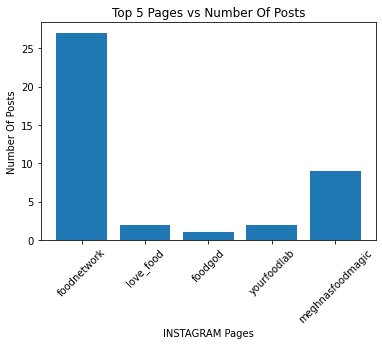

In [311]:
import matplotlib.pyplot as plt
x=new_lst
y=counter
plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel("INSTAGRAM Pages")
plt.ylabel("Number Of Posts")
plt.title("Top 5 Pages vs Number Of Posts")
plt.show()
#plotting a bargraph on how many posts each page has done in past 3 days

Question 2 Part 1 and Part 2:

In [312]:
dct_content={}
#defining a dictionary for tghe content of each handles first 10 posts
from nltk.tokenize import RegexpTokenizer
# importing the  RegexpTokenizer libreary for cleaning the text
for i in out:        
    
    
    str=i
    print(str)
    driver.get('https://www.instagram.com/' + str) 
    #visiting each handle
    
    driver.implicitly_wait(5)
    post=driver.find_element_by_class_name('_9AhH0')     
    driver.implicitly_wait(3)
    post.click()
    #clicking the first post
    
    for i in range(0,10) :
        #loop for first post
        sample=[]
        # defining two lists which are empty after each post sample 1 and 2
        sample2=[]
        
        
       
        content=driver.find_element_by_xpath('//div[@class = "C4VMK"]/span')
        clear_content=content.text
       
        # finding the content of eacch post and getting the text portion out of it
        
        tokenizer = RegexpTokenizer(r'\w+')
        content_list=tokenizer.tokenize(clear_content)
        # cleaning the text using  tokenizer.tokenize function
        for i in content_list:
            sample.append(i.split())
            # splitting the sentences into lists of word and appending the lists into a list ,making
            # a list of lists named sample
        for i in sample:
            for j in i:
                sample2.append(j)
                # coverting  list of lists to a single list , named sample 
        for i in sample2:
            # taking out words from list and putting them in a dictionary , thus also getting their frequency
            if i in dct_content: 
                dct_content[i]+=1
            else:
                dct_content[i]=1
        driver.implicitly_wait(5)
        driver.find_element_by_class_name('_65Bje').click()    
        # #clicking on the next post


    
    driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG > button > div > svg').click()
    # finding cut button and clicking after for loop is over for one handle


foodnetwork
love_food
foodgod
yourfoodlab
meghnasfoodmagic


Question 2 Part 3:

In [313]:
dct_content
import pandas as pd

df = pd.DataFrame(list(dct_content.items()),columns = ['word','frequency']) 
df
df.to_csv('wordfrequency.csv',index=False) 
#converting the dictionary to pandas dataframe and then to a csv file attached

In [314]:
dct_content

{'No': 3,
 'judgment': 1,
 'if': 5,
 'you': 27,
 'want': 5,
 'to': 62,
 'eat': 4,
 'TrishaYearwood': 1,
 's': 16,
 'Slow': 1,
 'Cooker': 1,
 'Corn': 1,
 'Dip': 1,
 'with': 25,
 'a': 50,
 'spoon': 2,
 'SouthernKitchen': 1,
 'Today': 1,
 '11': 1,
 '30a': 1,
 '10': 2,
 '30c': 1,
 'Click': 5,
 'the': 108,
 'link': 5,
 'in': 29,
 'our': 6,
 'bio': 5,
 'save': 1,
 'recipe': 44,
 'Citrus': 1,
 'Can': 3,
 'Chicken': 2,
 'sunnyanderson': 1,
 'A': 9,
 'single': 1,
 'can': 9,
 'of': 51,
 'lemon': 1,
 'lime': 2,
 'malt': 1,
 'beverage': 1,
 'pulls': 1,
 'double': 1,
 'duty': 1,
 'as': 9,
 'it': 49,
 'supports': 1,
 'and': 68,
 'flavors': 3,
 'an': 9,
 'entire': 1,
 'whole': 3,
 'grilled': 2,
 'chicken': 7,
 'Genius': 1,
 'SunnyAnderson': 1,
 'TheKitchen': 1,
 'Saturdays': 2,
 'at': 14,
 '11a': 2,
 '10c': 2,
 'Get': 2,
 'on': 27,
 'FoodNetwork': 4,
 'com': 5,
 'This': 13,
 'apple': 1,
 'shaped': 1,
 'dessert': 3,
 'looks': 2,
 'so': 13,
 'REAL': 1,
 'cedricgrolet': 1,
 'How': 1,
 'Make': 2,
 'chefs

Question2 part 4:

In [316]:
dct_hashtag={}
# doing the same process as above now just finding hashtag from hastag list
for i in out:        
    
    
    str=i
    print(str)
    driver.get('https://www.instagram.com/' + str) 
    #visiting each handle
   
    driver.implicitly_wait(5)
    post=driver.find_element_by_class_name('_9AhH0')     
    driver.implicitly_wait(3)
    post.click()

     
    for i in range(0,10) :
        
        
        
        hashtag=driver.find_elements_by_class_name('xil3i')
        #finding the hastaG LIST
        for i in hashtag:
            i=i.get_attribute('innerHTML')
            tokenizer = RegexpTokenizer(r'\w+')
            content_list=tokenizer.tokenize(i)
            
            for i in content_list:
                if i in dct_hashtag: 
                    dct_hashtag[i]+=1
                else:
                    dct_hashtag[i]=1

    driver.find_element_by_class_name('_65Bje').click()

  
    driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG > button > div > svg').click()



foodnetwork
love_food
foodgod
yourfoodlab
meghnasfoodmagic


In [317]:
dct_hashtag
dct_hashtag={k: v for k, v in sorted(dct_hashtag.items(), key=lambda item: item[1],reverse=True)}
#sorting the hashtag dictionary
Top5_hashtag= dict(list(dct_hashtag.items())[0: 5])
Top5_hashtag
# Finding the top 5 hasthag

{'SouthernKitchen': 10,
 'lovefood': 10,
 'recipe': 10,
 'monsoons': 10,
 'sinhagadfort': 10}

Question 2 part 5:

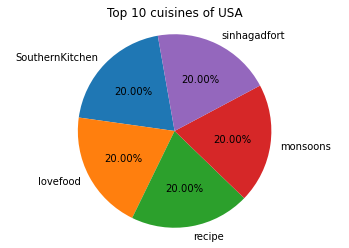

In [318]:
a=[]
b=[]
for i in Top5_hashtag:
     a.append(i)
#appending the labels to get labels in a list         
for i in Top5_hashtag.values():
     b.append(i)
#appending the values to get value of label in a list        
plt.title('Top 10 cuisines of USA')
plt.pie(b, labels=a, autopct="%.2f%%",  startangle=100)
plt.axis("equal")
plt.show() 
# plotting the pie chart for top 5 hashtag

Question 3 Part 1:

In [319]:
Total_likes=[]
# defining a list for finding Total likes for all pages 
from selenium.common.exceptions import NoSuchElementException
# importing NoSuchElementException   in case there is no likes present 
for i in out:        
    # traversing throught each page in out dict
    str=i
    print(str)
    driver.get('https://www.instagram.com/' + str) 
    #visiting each handle
    
    driver.implicitly_wait(5)
    post=driver.find_element_by_class_name('_9AhH0')     
    driver.implicitly_wait(3)
    post.click()
    # finding the first post and clicking it

    count=0 
    #making initial count for each page 0
    for i in range(0,10) :
        # going through 10 posts for each handle
        driver.find_element_by_class_name('_65Bje').click() 
        try:
            # putting try to find the number of a like for a certain post
            likes=driver.find_element_by_xpath('//div[@class = "Nm9Fw"]')
            
            likes=likes.text.split()
            
            like=likes[0]
            # finding the number of likes and cleaning it and convertinfg to a float
            like=float(like.replace(",",""))
            like
            count+=like
            # increaing the value of count 
        except NoSuchElementException:
            continue
            # if not able to find likes then continuing the loop 
       
    Total_likes.append(count)
    # Appending the Total likes for one handle to the list  


  
    driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG > button > div > svg').click()
    # after on handle is fully traversed clicking on the cut button


foodnetwork
love_food
foodgod
yourfoodlab
meghnasfoodmagic


Question 3 part 2:

In [320]:
Total_likes
avg_likes=[]
# making a list for appending average likes for a page
for i in Total_likes:
    avg_likes.append(i/10)
    #appending the list with average likes
avg_likes    

[5965.4, 9196.5, 11199.7, 18894.8, 3523.5]

Question 3 part 3:

In [321]:

follower_to_like_ratio=[]
# making a list for Finding and appending follower to like ratio
numberoffollwers=[]
# a list for finding number of followers for top 5 pages from dictionary previosly defined named out
for i in out.values():
    numberoffollwers.append(i)
    # appending the number of followers
pagename=[i for i in out]
#getting the name of Top 5 pages
res = [i / j for i, j in zip(numberoffollwers , avg_likes)]
#making a list named res having follower to like ratio for each page , by dividing the two lists
res


[1777.6088778623396,
 741.6780296852063,
 318.29004348330756,
 74.21391070559096,
 274.3232581240244]

Question3 part 4:

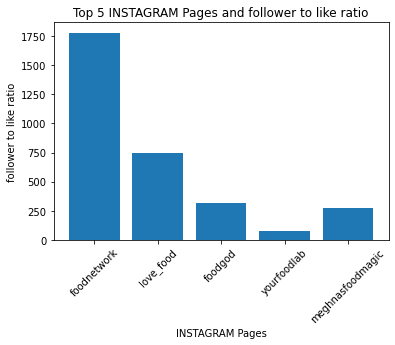

In [322]:
x=pagename
y=res
plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel("INSTAGRAM Pages")
plt.ylabel("follower to like ratio")
plt.title("Top 5 INSTAGRAM Pages and follower to like ratio")
plt.show()
#plotting a graph for average  follwer to ratio